In [1]:
# 분석 외 불필요한 내용 처리
import warnings
warnings.filterwarnings('ignore')

# 데이터 로드
import pandas as pd
df = pd.read_csv('../input/big-data-certification-study/Fvote.csv', encoding='utf-8')
df.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [2]:
# 데이터셋 분할
X = df.drop(columns=['vote', 'parties'])
y = df[['vote']]

df.shape, X.shape, y.shape

((211, 15), (211, 13), (211, 1))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

# Grid Search

In [4]:
# Hyper Parameter 및 Value 설정
from sklearn.model_selection import GridSearchCV
grid_param={'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [5]:
# 로지스틱 회귀모델
from sklearn.linear_model import LogisticRegression

In [6]:
# Grid Search 형식
# GridSearchCV(알고리즘 모델, 설정한 그리드 서치, cv (교차검증값), return_train_score)
grid_search = GridSearchCV(LogisticRegression(), grid_param, cv=5, return_train_score=True)
# X, y의 훈련데이터 fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [7]:
# 가장 높은 정확도의 Hyperparameter 확인
# grid_search.best_params_
# 가장 높은 정확도 확인
# grid_search.best_score_

print('Best Parameter :', grid_search.best_params_)
print('Best CV Score :', round(grid_search.best_score_, 3))

Best Parameter : {'C': 10}
Best CV Score : 0.727


In [8]:
# 테스트 데이터에 적용한 결과
print('Test Set Score :', round(grid_search.score(X_test,y_test), 3))

Test Set Score : 0.679


In [9]:
# 상세 결과값 확인
# grid_search.cv_results_
# DataFrame으로 변경하여 확인
result_grid = pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007958,0.002583,0.002333,0.000350,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.006914,0.000233,0.001996,0.000024,0.01,{'C': 0.01},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
2,0.010439,0.001049,0.002066,0.000042,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,...,0.721573,0.030797,3,0.730159,0.738095,0.738095,0.740157,0.708661,0.731034,0.011698
3,0.014097,0.000638,0.002086,0.000042,1,{'C': 1},0.71875,0.68750,0.81250,0.580645,...,0.721169,0.085441,4,0.738095,0.785714,0.730159,0.763780,0.724409,0.748431,0.022993
4,0.019303,0.002012,0.002087,0.000057,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
5,0.021604,0.001946,0.002087,0.000031,100,{'C': 100},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


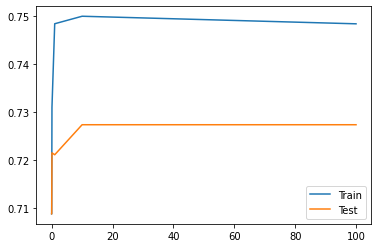

In [10]:
# 그래프로 확인
# X축 - result_grid['param_C']
# Y축 - result_grid['mean_train_score']

import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label='Train')
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label='Test')
plt.legend();

# Random Search

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'C': randint(low=0.001, high=100)}

In [12]:
# Randomized Search 형식
# RandomizedSearchCV(알고리즘,
# param_distributions=설정한 내용, cv(교차검증)
# n_iter (랜덤 횟수로, 기본값 10), return_train_score)
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions = param_distribs,
                                   cv=5, n_iter=100, return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f100b46abd0>},
                   return_train_score=True)

In [13]:
print('Best Parameter :', random_search.best_params_)
print('Best Score :', round(random_search.best_score_, 3))

Best Parameter : {'C': 43}
Best Score : 0.727


In [14]:
print('Test Set Score :', round(random_search.score(X_test, y_test), 3))

Test Set Score : 0.679


In [15]:
result_random = pd.DataFrame(random_search.cv_results_)
result_random

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020843,0.001975,0.002201,0.000165,43,{'C': 43},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
1,0.021915,0.001733,0.002131,0.000011,56,{'C': 56},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
2,0.021769,0.001442,0.002210,0.000124,83,{'C': 83},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
3,0.019762,0.001340,0.002070,0.000014,65,{'C': 65},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
4,0.022732,0.001737,0.002230,0.000192,84,{'C': 84},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.022242,0.001317,0.002084,0.000024,56,{'C': 56},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
96,0.020093,0.001844,0.002061,0.000058,78,{'C': 78},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
97,0.018324,0.001442,0.002182,0.000122,8,{'C': 8},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
98,0.020449,0.000907,0.002077,0.000018,31,{'C': 31},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


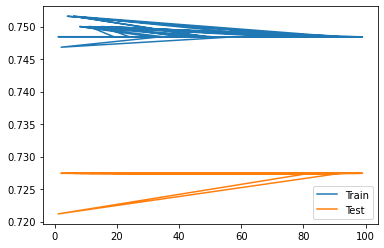

In [16]:
plt.plot(result_random['param_C'], result_random['mean_train_score'], label='Train')
plt.plot(result_random['param_C'], result_random['mean_test_score'], label='Test')
plt.legend()

# Machine Learning Process - Model Evaluation

In [17]:
# Hyperparameter Tuning
final_model = LogisticRegression(C=10)
final_model.fit(X_train, y_train)

LogisticRegression(C=10)

In [18]:
# 훈련데이터 예측 및 정확도
pred_train=final_model.predict(X_train)
final_model.score(X_train, y_train)

0.740506329113924

In [19]:
# 테스트데이터 예측 및 정확도
pred_test=final_model.predict(X_test)
final_model.score(X_test, y_test)

0.6792452830188679

In [20]:
# 훈련데이터 혼동행렬 확인
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print('훈련데이터 혼동행렬 : \n', confusion_train)

훈련데이터 혼동행렬 : 
 [[ 12  34]
 [  7 105]]


In [21]:
# 훈련데이터 분류예측 레포트 확인
from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train)
print('훈련데이터 분류예측 레포트 : \n', cfreport_train)

훈련데이터 분류예측 레포트 : 
               precision    recall  f1-score   support

           0       0.63      0.26      0.37        46
           1       0.76      0.94      0.84       112

    accuracy                           0.74       158
   macro avg       0.69      0.60      0.60       158
weighted avg       0.72      0.74      0.70       158



In [22]:
# 테스트데이터 혼동행렬 확인
confusion_test = confusion_matrix(y_test, pred_test)
print('테스트데이터 혼동행렬 : \n', confusion_test)

테스트데이터 혼동행렬 : 
 [[ 3 12]
 [ 5 33]]


In [23]:
# 테스트데이터 분류예측 레포트 확인
cfreport_test=classification_report(y_test, pred_test)
print('테스트데이터 분류예측 레포트 :\n', cfreport_test)

테스트데이터 분류예측 레포트 :
               precision    recall  f1-score   support

           0       0.38      0.20      0.26        15
           1       0.73      0.87      0.80        38

    accuracy                           0.68        53
   macro avg       0.55      0.53      0.53        53
weighted avg       0.63      0.68      0.64        53



In [24]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
fp_rate, tp_rate, thresholds = roc_curve(y_test, final_model.decision_function(X_test))
roc_auc = metrics.roc_auc_score(y_test, final_model.decision_function(X_test))
roc_auc

0.6350877192982456

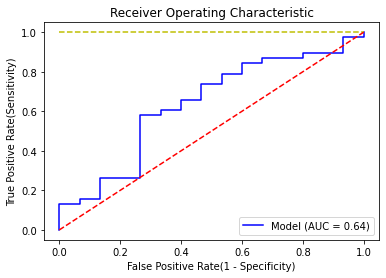

In [25]:
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(fp_rate, tp_rate, 'b', label='Model (AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show();